In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

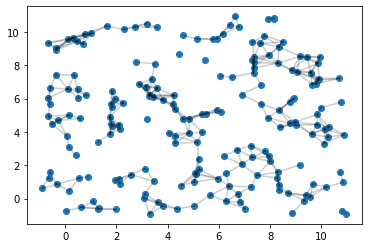

In [112]:
# ********************************************************************************* #
# LEARNING
# ********************************************************************************* #

# obstacle
plt.fill([2,4,4,2],[2,2,4,4],'k')

# samples
# x=np.random.uniform(-1,11,200)
# y=np.random.uniform(-1,11,200)
x=(np.random.rand(200)*12)-1
y=(np.random.rand(200)*12)-1

# eliminate samples inside obstacles
xindex=np.array([],dtype=int)
yindex=np.array([],dtype=int)
for i in range(len(x)):
    if x[i]>=2 and x[i]<=4 and y[i]>=2 and y[i]<=4:
        xindex=np.append(xindex,i)
        yindex=np.append(yindex,i)
x=np.delete(x,xindex)
y=np.delete(y,yindex)

# plot
plt.scatter(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        if np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)<=1:
            plt.plot([x[i],x[j]],[y[i],y[j]],'k',alpha=0.1)

In [94]:
a=np.array([1,2,3,3])
a=np.delete(a,3)

In [95]:
a

array([1, 2, 3])